This is a notebook showing basic capabilities of the biomechZoo python toolbox

In [1]:
# import libraries
import os
from biomechzoo import BiomechZoo
from utils.engine import engine
from utils.zload import zload

In [2]:
# Step 0 get raw data folder and create an instance of biomechZoo class
project_root = os.getcwd()
fld_raw_data = os.path.join(project_root, 'data', 'sample_study', 'raw c3d files')
verbose = 'minimal'   # show only some processing output
inplace = False       # if false, data are saved to new folder at each step
bmech = BiomechZoo(fld_raw_data, verbose='minimal', inplace=inplace)


BiomechZoo initialized
verbosity set to: minimal
processing folder set to: /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files
Processing mode: backup (inplace=False)(each step will be applied to a new folder)


In [3]:
# step 1: convert c3d to zoo
bmech.c3d2zoo(out_folder='1-c3d2zoo')

c3d to zoo conversion complete


In [4]:
# step 2: Remove channels not necessary for analysis
ch = ['RHipAngles', 'RKneeAngles', 'RAnkleAngles', 'SACR']
bmech.removechannel(ch, mode='keep',out_folder='2-removechannel')


remove channel complete


In [5]:
# step 3: explode channels
bmech.explodechannel(out_folder='3-explodechannels')


explode channel complete


In [6]:
# step 4: normalize data
bmech.normalize(nlen=101, out_folder='4-normalize')

/Users/phild/Code/biomechzoo/biomech_ops/normalize_data.py:25: UserWarning: event data have not been normalized
  warnings.warn('event data have not been normalized')
/Users/phild/Code/biomechzoo/biomech_ops/normalize_data.py:29: UserWarning: zoosystem data have not been fully updated
  warnings.warn('zoosystem data have not been fully updated')


normalization complete


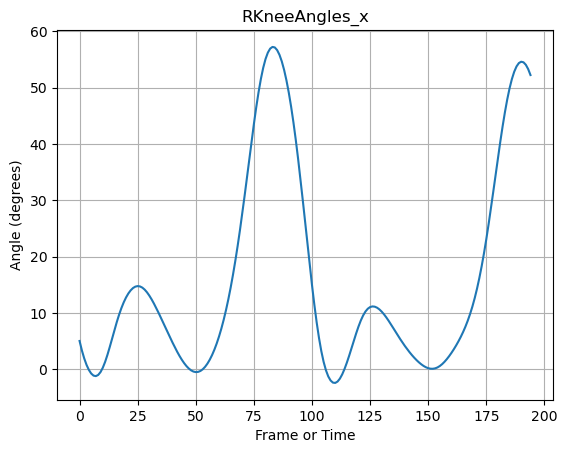

In [7]:
# let's plot a single zoo file using matplotlib
import matplotlib.pyplot as plt
fld = bmech.in_folder
fl = engine(fld, extension='.zoo',name_contains='HC032')[0]
data = zload(fl)
array_to_plot = data['RKneeAngles_x']['line']
plt.figure()
plt.plot(array_to_plot)
plt.title('RKneeAngles_x')
plt.xlabel('Frame or Time')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()


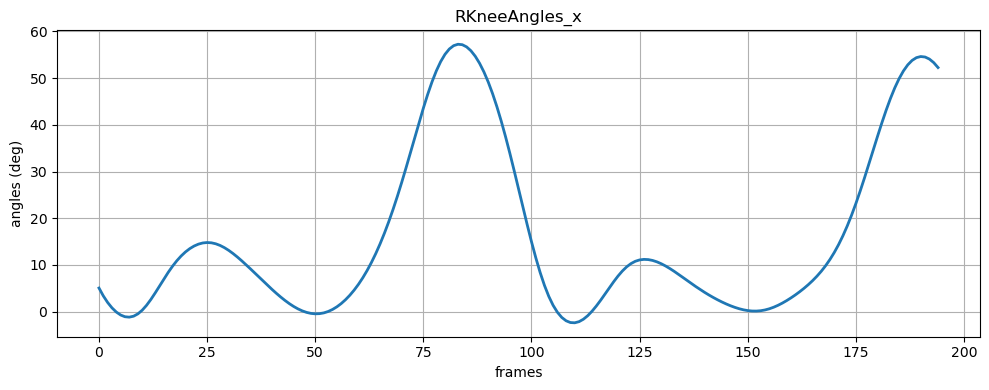

In [8]:
# let's plot at a single zoo using our zplot helper function
from utils.zplot import zplot
fld = bmech.in_folder
fl = engine(fld, extension='.zoo',name_contains='HC032')[0]
data = zload(fl)
zplot(data, 'RKneeAngles_x')